# Project 4 : Wrangle and Analyze Data

## Introduction

The dataset that I will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user [@dog_rates](https://twitter.com/dog_rates), also known as [WeRateDogs](https://en.wikipedia.org/wiki/WeRateDogs). 

WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "[they're good dogs Brent](http://knowyourmeme.com/memes/theyre-good-dogs-brent)." WeRateDogs has over 4 million followers and has received international media coverage.

WeRateDogs [downloaded their Twitter archive](https://support.twitter.com/articles/20170160) and sent it to Udacity via email exclusively for you to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017. More on this soon.

<img src = "https://video.udacity-data.com/topher/2017/October/59dd378f_dog-rates-social/dog-rates-social.jpg" height =200px, width = 400px>
<center>Image via <a href = "http://www.bostonmagazine.com/arts-entertainment/blog/2017/04/18/dog-rates-mit/">Boston Magazine</a></center>


## Project Motivation

### Context

My goal in this project is to wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information. Additional gathering, then assessing and cleaning is required for "Wow!"-worthy analyses and visualizations.


## The Data

### Enhanced Twitter Archive

The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything. One column the archive does contain though: each tweet's text, which was used to extract rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo) to make this Twitter archive "enhanced." Of the 5000+ tweets, The tweets have been filtered with ratings only (there are 2356).
Extracted data from tweet text

<img src = "https://video.udacity-data.com/topher/2017/October/59dd4791_screenshot-2017-10-10-18.19.36/screenshot-2017-10-10-18.19.36.png" height = 400px, width= 800px>

<center><em><strong>The extracted data from each tweet's text</strong></em></center>

This data was extracted programmatically, but a very good job wasnt done. The ratings probably aren't all correct. Same goes for the dog names and probably dog stages (see below for more information on these) too. I will need to assess and clean these columns so that i can use them for analysis and visualization.

<img src="https://video.udacity-data.com/topher/2017/October/59e04ceb_dogtionary-combined/dogtionary-combined.png" height = 400px, width=900px>

<center><em><strong>The Dogtionary explains the various stages of dog: doggo, pupper, puppo, and floof(er) (via the <a href = "https://www.amazon.com/WeRateDogs-Most-Hilarious-Adorable-Youve/dp/1510717145">#WeRateDogs</a> book on Amazon)</strong></em></center>

### Additional Data via the Twitter API

Back to the basic-ness of Twitter archives: retweet count and favorite count are two of the notable column omissions. Fortunately, this additional data can be gathered by anyone from Twitter's API. Well, "anyone" who has access to data for the 3000 most recent tweets, at least. But because I have the WeRateDogs Twitter archive and specifically the tweet IDs within it, I can gather this data for all 5000+. and Iam going to query Twitter's API to gather this valuable data.

### Image Predictions File

One more cool thing: Every image in the WeRateDogs Twitter archive was ran through a [neural network](https://www.youtube.com/watch?v=2-Ol7ZB0MmU) that can classify breeds of dogs*. The results: a table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images).

<img src="https://video.udacity-data.com/topher/2017/October/59dd4d2c_screenshot-2017-10-10-18.43.41/screenshot-2017-10-10-18.43.41.png" width = 900px, height=400px>
<center><em><strong>Tweet image prediction data</strong></em></center>

So for the last row in that table:

* tweet_id is the last part of the tweet URL after "status/" → https://twitter.com/dog_rates/status/889531135344209921
* p1 is the algorithm's #1 prediction for the image in the tweet → <strong>golden retriever</strong>
* p1_conf is how confident the algorithm is in its #1 prediction → <strong>95%</strong>
* p1_dog is whether or not the #1 prediction is a breed of dog → <strong>TRUE</strong>
* p2 is the algorithm's second most likely prediction → Labrador <strong>retriever</strong>
* p2_conf is how confident the algorithm is in its #2 prediction → <strong>1%</strong>
* p2_dog is whether or not the #2 prediction is a breed of dog → <strong>TRUE</strong>
* etc.

And the #1 prediction for the image in that tweet was spot on:

<img src="https://video.udacity-data.com/topher/2017/October/59dd4e05_dog-pred/dog-pred.png" width = 250px, height=200px>
<center><strong>A golden retriever named Stuart</strong></center>

So that's all fun and good. But all of this additional data will need to be gathered, assessed, and cleaned. This is where I come in.

### Key Points

Key point I am keeping in mind when data wrangling for this project:
<ul>
    <li>I only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.</li>
    <li>Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.</li>
    <li>Cleaning includes merging individual pieces of data according to the rules of <a href="https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html">tidy data</a>.</li>
    <li>The fact that the rating numerators are greater than the denominators does not need to be cleaned. This <a href="http://knowyourmeme.com/memes/theyre-good-dogs-brent">unique rating system</a> is a big part of the popularity of WeRateDogs.</li>


### Steps in this project

1. Importing Libaries 
2. Gather Data
3. Accessing Data
3. Cleaning Data
4. Storing Data
5. Data Visualization

# 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests

# 2. Gathering of Data

#### Reading the Enhanced Twitter Archive using Pandas

In [2]:
Twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")

In [3]:
Twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
Twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### Downloading the Image Predictions using Request

In [5]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# Save HTML to file

with open("image_predictions.tsv", mode='wb') as file:
    file.write(response.content)

In [6]:
# Showing the data in the image predictions file
image_predictions = pd.read_csv('image_predictions.tsv', sep = '\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = "qhSwqxpKslaBZofulQi598DrI"
consumer_secret = "UTdmFpZb24IHcGc8CAaxArwq6LfyVMgUZz1gSuJuHyu7lj7hD0"
access_token = "793618519-K9kFIsgzD9vhp14kD5GxOLnGFEGl3jnjVZnwcMh5"
access_secret = "ySEfCVU4qhRHZ8dTC7r1geQjFABInO0r79MWlK6TZxzLB"

#Create the Twitter API object and set rate limit
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = Twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
315: 835172783151792128
Fail
316: 835152434251116546
Fail
317: 834931633769889797
Fail
318: 834786237630337024
Fail
319: 834574053763584002
Fail
320: 834477809192075265
Fail
321: 834458053273591808
Fail
322: 834209720923721728
Fail
323: 834167344700198914
Fail
324: 834089966724603904
Fail
325: 834086379323871233
Fail
326: 833863086058651648
Fail
327: 833826103416520705
Fail
328: 833732339549220864
Fail
329: 833722901757046785
Fail
330: 833479644947025920
Fail
331: 833124694597443584
Fail
332: 832998151111966721
Fail
333: 832769181346996225
Fail
334: 832757312314028032
Fail
335: 832682457690300417
Fail
336: 832645525019123713
Fail
337: 832636094638288896
Fail
338: 832397543355072512
Fail
339: 832369877331693569
Fail
340: 832273440279240704
Fail
341: 832215909146226688
Fail
342: 832215726631055365
Fail
343: 832088576586297345
Fail
344: 832040443403784192
Fail
345: 832032802820481025
Fail
346: 831939777352105988
Fail
347: 831926988323639298
Fail
348: 831911600680497154
Fail
349: 8316

Fail
657: 791780927877898241
Fail
658: 791774931465953280
Fail
659: 791672322847637504
Fail
660: 791406955684368384
Fail
661: 791312159183634433
Fail
662: 791026214425268224
Fail
663: 790987426131050500
Fail
664: 790946055508652032
Fail
665: 790723298204217344
Fail
666: 790698755171364864
Fail
667: 790581949425475584
Fail
668: 790337589677002753
Fail
669: 790277117346975746
Fail
670: 790227638568808452
Fail
671: 789986466051088384
Fail
672: 789960241177853952
Fail
673: 789903600034189313
Fail
674: 789628658055020548
Fail
675: 789599242079838210
Fail
676: 789530877013393408
Fail
677: 789314372632018944
Fail
678: 789280767834746880
Fail
679: 789268448748703744
Fail
680: 789137962068021249
Fail
681: 788908386943430656
Fail
682: 788765914992902144
Fail
683: 788552643979468800
Fail
684: 788412144018661376
Fail
685: 788178268662984705
Fail
686: 788150585577050112
Fail
687: 788070120937619456
Fail
688: 788039637453406209
Fail
689: 787810552592695296
Fail
690: 787717603741622272
Fail
691: 7873

Fail
967: 750383411068534784
Fail
968: 750381685133418496
Fail
969: 750147208377409536
Fail
970: 750132105863102464
Fail
971: 750117059602808832
Fail
972: 750101899009982464
Fail
973: 750086836815486976
Fail
974: 750071704093859840
Fail
975: 750056684286914561
Fail
976: 750041628174217216
Fail
977: 750026558547456000
Fail
978: 750011400160841729
Fail
979: 749996283729883136
Fail
980: 749981277374128128
Fail
981: 749774190421639168
Fail
982: 749417653287129088
Fail
983: 749403093750648834
Fail
984: 749395845976588288
Fail
985: 749317047558017024
Fail
986: 749075273010798592
Fail
987: 749064354620928000
Fail
988: 749036806121881602
Fail
989: 748977405889503236
Fail
990: 748932637671223296
Fail
991: 748705597323898880
Fail
992: 748699167502000129
Fail
993: 748692773788876800
Fail
994: 748575535303884801
Fail
995: 748568946752774144
Fail
996: 748346686624440324
Fail
997: 748337862848962560
Fail
998: 748324050481647620
Fail
999: 748307329658011649
Fail
1000: 748220828303695873
Fail
1001: 74

Fail
1311: 707038192327901184
Fail
1312: 707021089608753152
Fail
1313: 707014260413456384
Fail
1314: 706904523814649856
Fail
1315: 706901761596989440
Fail
1316: 706681918348251136
Fail
1317: 706644897839910912
Fail
1318: 706593038911545345
Fail
1319: 706538006853918722
Fail
1320: 706516534877929472
Fail
1321: 706346369204748288
Fail
1322: 706310011488698368
Fail
1323: 706291001778950144
Fail
1324: 706265994973601792
Fail
1325: 706169069255446529
Fail
1326: 706166467411222528
Fail
1327: 706153300320784384
Fail
1328: 705975130514706432
Fail
1329: 705970349788291072
Fail
1330: 705898680587526145
Fail
1331: 705786532653883392
Fail
1332: 705591895322394625
Fail
1333: 705475953783398401
Fail
1334: 705442520700944385
Fail
1335: 705428427625635840
Fail
1336: 705239209544720384
Fail
1337: 705223444686888960
Fail
1338: 705102439679201280
Fail
1339: 705066031337840642
Fail
1340: 704871453724954624
Fail
1341: 704859558691414016
Fail
1342: 704847917308362754
Fail
1343: 704819833553219584
Fail
1344:

Fail
1636: 684222868335505415
Fail
1637: 684200372118904832
Fail
1638: 684195085588783105
Fail
1639: 684188786104872960
Fail
1640: 684177701129875456
Fail
1641: 684147889187209216
Fail
1642: 684122891630342144
Fail
1643: 684097758874210310
Fail
1644: 683857920510050305
Fail
1645: 683852578183077888
Fail
1646: 683849932751646720
Fail
1647: 683834909291606017
Fail
1648: 683828599284170753
Fail
1649: 683773439333797890
Fail
1650: 683742671509258241
Fail
1651: 683515932363329536
Fail
1652: 683498322573824003
Fail
1653: 683481228088049664
Fail
1654: 683462770029932544
Fail
1655: 683449695444799489
Fail
1656: 683391852557561860
Fail
1657: 683357973142474752
Fail
1658: 683142553609318400
Fail
1659: 683111407806746624
Fail
1660: 683098815881154561
Fail
1661: 683078886620553216
Fail
1662: 683030066213818368
Fail
1663: 682962037429899265
Fail
1664: 682808988178739200
Fail
1665: 682788441537560576
Fail
1666: 682750546109968385
Fail
1667: 682697186228989953
Fail
1668: 682662431982772225
Fail
1669:

Fail
1979: 672984142909456390
Fail
1980: 672980819271634944
Fail
1981: 672975131468300288
Fail
1982: 672970152493887488
Fail
1983: 672968025906282496
Fail
1984: 672964561327235073
Fail
1985: 672902681409806336
Fail
1986: 672898206762672129
Fail
1987: 672884426393653248
Fail
1988: 672877615439593473
Fail
1989: 672834301050937345
Fail
1990: 672828477930868736
Fail
1991: 672640509974827008
Fail
1992: 672622327801233409
Fail
1993: 672614745925664768
Fail
1994: 672609152938721280
Fail
1995: 672604026190569472
Fail
1996: 672594978741354496
Fail
1997: 672591762242805761
Fail
1998: 672591271085670400
Fail
1999: 672538107540070400
Fail
2000: 672523490734551040
Fail
2001: 672488522314567680
Fail
2002: 672482722825261057
Fail
2003: 672481316919734272
Fail
2004: 672475084225949696
Fail
2005: 672466075045466113
Fail
2006: 672272411274932228
Fail
2007: 672267570918129665
Fail
2008: 672264251789176834
Fail
2009: 672256522047614977
Fail
2010: 672254177670729728
Fail
2011: 672248013293752320
Fail
2012:

Fail
2283: 667211855547486208
Fail
2284: 667200525029539841
Fail
2285: 667192066997374976
Fail
2286: 667188689915760640
Fail
2287: 667182792070062081
Fail
2288: 667177989038297088
Fail
2289: 667176164155375616
Fail
2290: 667174963120574464
Fail
2291: 667171260800061440
Fail
2292: 667165590075940865
Fail
2293: 667160273090932737
Fail
2294: 667152164079423490
Fail
2295: 667138269671505920
Fail
2296: 667119796878725120
Fail
2297: 667090893657276420
Fail
2298: 667073648344346624
Fail
2299: 667070482143944705
Fail
2300: 667065535570550784
Fail
2301: 667062181243039745
Fail
2302: 667044094246576128
Fail
2303: 667012601033924608
Fail
2304: 666996132027977728
Fail
2305: 666983947667116034
Fail
2306: 666837028449972224
Fail
2307: 666835007768551424
Fail
2308: 666826780179869698
Fail
2309: 666817836334096384
Fail
2310: 666804364988780544
Fail
2311: 666786068205871104
Fail
2312: 666781792255496192
Fail
2313: 666776908487630848
Fail
2314: 666739327293083650
Fail
2315: 666701168228331520
Fail
2316:

In [8]:
# Converting the txt file to a data list

df_list = []
with open('tweet_json.txt') as file:
    for line in file:
        df_list.append(json.loads(line))

In [9]:
print(df_list[0])

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended_entities': {'media

In [10]:
#creating a data frame from the previous list that contains the id, retweet count and favorite count
tweet_data = pd.DataFrame(df_list,columns = ['id','retweet_count', 'favorite_count'])

In [11]:
tweet_data.head()

,id,retweet_count,favorite_count
0,892420643555336193,7044,33900
1,892177421306343426,5320,29393
2,891815181378084864,3499,22108
3,891689557279858688,7254,37015
4,891327558926688256,7795,35394


In [12]:
#renaming the id column to tweet_id

tweet_data = tweet_data.rename(columns = {'id':'tweet_id'})
tweet_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7044,33900
1,892177421306343426,5320,29393
2,891815181378084864,3499,22108
3,891689557279858688,7254,37015
4,891327558926688256,7795,35394


In [13]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        219 non-null    int64
 1   retweet_count   219 non-null    int64
 2   favorite_count  219 non-null    int64
dtypes: int64(3)
memory usage: 5.3 KB


# 3. Accessing Data




#### Assessing Enhanced Twitter Archive Data

###  Visual assessment

In [14]:
Twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Programmatic assessment

In [15]:
Twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [16]:
Twitter_archive.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [17]:
Twitter_archive.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [18]:
Twitter_archive[Twitter_archive.rating_numerator < 10].count()[0]

440

In [19]:
#the IDs that have numerators with less than 10
Twitter_archive[Twitter_archive.rating_numerator < 10].tweet_id

45      883482846933004288
229     848212111729840128
315     835152434251116546
387     826598799820865537
462     817502432452313088
               ...        
2351    666049248165822465
2352    666044226329800704
2353    666033412701032449
2354    666029285002620928
2355    666020888022790149
Name: tweet_id, Length: 440, dtype: int64

In [20]:
# checking rating_numerator of tweet_id  666033412701032449
Twitter_archive.loc[(Twitter_archive.tweet_id ==  666033412701032449), 'rating_numerator']

2353    9
Name: rating_numerator, dtype: int64

In [21]:
#Checking text of tweet_id 666033412701032449 using the row number
Twitter_archive.loc[2353,'text']

'Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR'

In [22]:
Twitter_archive.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

From the above, we can see that some denominators has zero ratings.
Lets explore to see the IDs with this rating

In [23]:
#checking for the ids with zero denominator ratings
Twitter_archive[Twitter_archive.rating_denominator == 0].tweet_id

313    835246439529840640
Name: tweet_id, dtype: int64

Just one ID has zero as its denominator rating

In [24]:
Twitter_archive.loc[313,'text']

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

In [25]:
Twitter_archive[Twitter_archive.rating_denominator!=10].count()[0]

23

In [26]:
Twitter_archive['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

### Acessing the Tweet Image Predictions

###  Visual assessment

In [27]:
image_predictions = pd.read_csv('image_predictions.tsv', sep = '\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [28]:
image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1714,818627210458333184,https://pbs.twimg.com/media/C1xZGkzWIAA8vh4.jpg,1,Labrador_retriever,0.384188,True,beagle,0.255917,True,grocery_store,0.079799,False
1110,724004602748780546,https://pbs.twimg.com/media/CgwuWCeW4AAsgbD.jpg,3,Siamese_cat,0.950526,False,pug,0.018877,True,quilt,0.007628,False
343,672264251789176834,https://pbs.twimg.com/media/CVRcxJ-WsAAXOhO.jpg,1,Chihuahua,0.609860,True,teddy,0.068134,False,Norwich_terrier,0.059227,True
818,692901601640583168,https://pbs.twimg.com/media/CZ2uU37UcAANzmK.jpg,1,soft-coated_wheaten_terrier,0.403496,True,cocker_spaniel,0.135164,True,golden_retriever,0.088719,True
1930,858843525470990336,https://pbs.twimg.com/media/C-s5oYZXkAAMHHq.jpg,1,golden_retriever,0.578120,True,Labrador_retriever,0.286059,True,bloodhound,0.026917,True
839,694356675654983680,https://pbs.twimg.com/media/CaLZtmsWQAApbFw.jpg,1,hamster,0.429871,False,Pomeranian,0.144272,True,pretzel,0.127220,False
1589,798628517273620480,https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg,1,beagle,0.636169,True,Labrador_retriever,0.119256,True,golden_retriever,0.082549,True
579,678764513869611008,https://pbs.twimg.com/media/CWt0ubZWcAAkFER.jpg,1,Irish_terrier,0.696646,True,Australian_terrier,0.074962,True,Irish_setter,0.063901,True
1075,717047459982213120,https://pbs.twimg.com/media/CfN23ArXEAEkZkz.jpg,1,golden_retriever,0.983548,True,Labrador_retriever,0.012185,True,cocker_spaniel,0.002412,True
1071,716439118184652801,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,1,Siberian_husky,0.396495,True,malamute,0.317053,True,Eskimo_dog,0.273419,True


### Programmatic assessment

In [29]:
image_predictions.loc[1312]

tweet_id                                   754482103782404096
jpg_url     https://pbs.twimg.com/ext_tw_video_thumb/75448...
img_num                                                     1
p1                                                        tub
p1_conf                                              0.596796
p1_dog                                                  False
p2                                                    bathtub
p2_conf                                              0.381098
p2_dog                                                  False
p3                                             shower_curtain
p3_conf                                              0.017629
p3_dog                                                  False
Name: 1312, dtype: object

In [30]:
#investigating to see why the dog ia named a bathhub
image_predictions.loc[1312,'jpg_url']

'https://pbs.twimg.com/ext_tw_video_thumb/754481405627957248/pu/img/YY1eBDOlP9QFC4Bj.jpg'

In [31]:
from IPython.display import Image
Image(url = 'https://pbs.twimg.com/ext_tw_video_thumb/754481405627957248/pu/img/YY1eBDOlP9QFC4Bj.jpg')

In [32]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [33]:
# This is an image for tweet_id 676146341966438401
Image(url = 'https://pbs.twimg.com/media/CWIngp5WEAAJOy3.jpg')

In [34]:
image_predictions['p1'].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [35]:
image_predictions['p2'].value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
medicine_chest          1
quail                   1
horse_cart              1
waffle_iron             1
bagel                   1
Name: p2, Length: 405, dtype: int64

In [36]:
image_predictions['p3'].value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
ox                     1
assault_rifle          1
axolotl                1
pot                    1
banana                 1
Name: p3, Length: 408, dtype: int64

## Accessing tweet data from Twitter API


###  Visual assessment

In [37]:
tweet_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7044,33900
1,892177421306343426,5320,29393
2,891815181378084864,3499,22108
3,891689557279858688,7254,37015
4,891327558926688256,7795,35394


In [38]:
tweet_data.sample(10)

,tweet_id,retweet_count,favorite_count
60,880221127280381952,3488,23728
31,886054160059072513,93,0
186,855138241867124737,36,0
206,850380195714523136,2345,12115
138,863907417377173506,3614,18485
158,860177593139703809,26899,0
6,890971913173991426,1677,10394
28,886366144734445568,2640,18589
83,876484053909872640,2009,16604
127,866720684873056260,4148,17918


### Programmatic assessment

In [39]:
tweet_data.describe()

,tweet_id,retweet_count,favorite_count
count,2.190000e+02,219.000000,219.000000
mean,8.703658e+17,5200.415525,21360.511416
std,1.286179e+16,5039.907882,16259.863361
min,8.482121e+17,3.000000,0.000000
25%,8.589675e+17,2655.500000,14086.000000
50%,8.707263e+17,3936.000000,19764.000000
75%,8.815847e+17,6005.500000,26586.000000
max,8.924206e+17,37613.000000,109130.000000


## Tidiness
1. Dog stage data is separated into 4 columns
2. All data are related but are in 3 deferent data frames

## Quality

### Enhanced Twitter Archive
1. There are 181 retweets as under the retweeted_status_id
2. There are invalid dog names under the names column
3. The timestamp has strings has its data types instead of datetime.
4. Invalid tweet_id datatypes i.e having integers instead of strings
5. Row 313 has a 0 as its denominator rating
6. 23 rating denominators are not equal to 10
7. 440 rating numerators are less tha 10

### Image Predictions
1. Some P names begin with uppercase while others begin with lowercase


## Data Cleaning


##### Make copies of all the data frames



In [46]:
Twitter_archive_clean = Twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_data_clean = tweet_data.copy()

In [47]:
Twitter_archive_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [48]:
image_predictions_clean.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [49]:
tweet_data_clean.head(1)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7044,33900


# 4. Clean

Programmatic data cleaning is a separate process within data wrangling. It has three steps:

* Define
* Code
* Test

# Define
 
1. Merge the `clean versions` of `df_twitter_archive`, `df_image_predictions`, and `tweet_json` dataframes Correct the dog types
2. Create one column for the various dog types: doggo, floofer, pupper, puppo 
3. Delete retweets
4. Remove columns relating to retweets: retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp
5. Remove columns no longer needed: in_reply_to_status_id, in_reply_to_user_id
6. Change tweet_id from an integer to a string
7. Change the timestamp to correct datetime format
8. Convert invalid dog names:
9. Convert lowercase Letters to Uppercase
10. Creating a new dog_breed column using the image prediction data

## Define(1)
  
  
Merge the clean versions of Twitter_archive, image_predictions, and tweet_data dataframes and correct the dog types  


## The Code

In [108]:
df = pd.concat([Twitter_archive_clean, image_predictions_clean, tweet_data_clean], join='outer', axis=1)

In [109]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,tweet_id,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,8.924206e+17,7044.0,33900.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,8.921774e+17,5320.0,29393.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,True,malinois,0.138584,True,bloodhound,0.116197,True,8.918152e+17,3499.0,22108.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,8.916896e+17,7254.0,37015.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,True,Rottweiler,0.243682,True,Doberman,0.154629,True,8.913276e+17,7795.0,35394.0


In [110]:
df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'tweet_id',
       'retweet_count', 'favorite_count'],
      dtype='object')

## Test

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

## Define(2)


Create one column for the various dog types: doggo, floofer, pupper, puppo and remove the columns that are no longer needed e.g.:  in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp

## Code

In [112]:
#Creating a column for the various dog types:
df['dog_stage'] = df['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [113]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,tweet_id,retweet_count,favorite_count,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,collie,0.156665,True,Shetland_sheepdog,0.061428,True,8.924206e+17,7044.0,33900.0,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,8.921774e+17,5320.0,29393.0,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,malinois,0.138584,True,bloodhound,0.116197,True,8.918152e+17,3499.0,22108.0,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,redbone,0.360687,True,miniature_pinscher,0.222752,True,8.916896e+17,7254.0,37015.0,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,Rottweiler,0.243682,True,Doberman,0.154629,True,8.913276e+17,7795.0,35394.0,NaN


## Test

In [114]:
df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'tweet_id',
       'retweet_count', 'favorite_count', 'dog_stage'],
      dtype='object')

In [115]:
df['dog_stage'].value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: dog_stage, dtype: int64

# Define(3)

There are 181 retweets as under the retweeted_status_id so we have to delete the retweet

## Code

In [116]:
# removing retweets

df = df[df.retweeted_status_id.isnull()]

## Test

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

## Define(4)

Remove columns no longer needed related to retweets


### Code

In [118]:
df = df.drop(columns = ['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'])

### Test

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   2175 non-null   object 
 10  doggo                  2175 non-null   object 
 11  floofer                2175 non-null   object 
 12  pupper                 2175 non-null   object 
 13  puppo                  2175 non-null   object 
 14  tweet_id               1896 non-null   float64
 15  jpg_

## Define(5)

Remove columns no longer needed: in_reply_to_status_id, in_reply_to_user_id

## Code

In [120]:
df.drop(columns=['in_reply_to_status_id', 
                  'in_reply_to_user_id',
                  'source',
                  'img_num'], axis = 1, inplace=True)

In [121]:
# tweet_id is duplicated so we have to remove one

# Ref ----https://stackoverflow.com/questions/14984119/python-pandas-remove-duplicate-columns

df = df.loc[:,~df.columns.duplicated()]

## Test

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2175 non-null   int64  
 1   timestamp           2175 non-null   object 
 2   text                2175 non-null   object 
 3   expanded_urls       2117 non-null   object 
 4   rating_numerator    2175 non-null   int64  
 5   rating_denominator  2175 non-null   int64  
 6   name                2175 non-null   object 
 7   doggo               2175 non-null   object 
 8   floofer             2175 non-null   object 
 9   pupper              2175 non-null   object 
 10  puppo               2175 non-null   object 
 11  jpg_url             1896 non-null   object 
 12  p1                  1896 non-null   object 
 13  p1_conf             1896 non-null   float64
 14  p1_dog              1896 non-null   object 
 15  p2                  1896 non-null   object 
 16  p2_con

## Define(6) 

Change tweet_id from an integer to a string

## Code

In [123]:
#Ref : https://stackoverflow.com/questions/22231592/pandas-change-data-type-of-series-to-string

df['tweet_id'] = df['tweet_id'].astype(str)

## Test

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2175 non-null   object 
 1   timestamp           2175 non-null   object 
 2   text                2175 non-null   object 
 3   expanded_urls       2117 non-null   object 
 4   rating_numerator    2175 non-null   int64  
 5   rating_denominator  2175 non-null   int64  
 6   name                2175 non-null   object 
 7   doggo               2175 non-null   object 
 8   floofer             2175 non-null   object 
 9   pupper              2175 non-null   object 
 10  puppo               2175 non-null   object 
 11  jpg_url             1896 non-null   object 
 12  p1                  1896 non-null   object 
 13  p1_conf             1896 non-null   float64
 14  p1_dog              1896 non-null   object 
 15  p2                  1896 non-null   object 
 16  p2_con

## Define(7)

Change the timestamp to datetime format

### Code

In [125]:
#Remove the time zone from the 'timestamp' column
df['timestamp'] = df['timestamp'].str.slice(start=0, stop=-6)

#coverting to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], format = "%Y-%m-%d %H:%M:%S")

## Test

In [126]:
df.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_stage
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,...,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,7044.0,33900.0,NaN
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,...,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,5320.0,29393.0,NaN
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,...,True,malinois,0.138584,True,bloodhound,0.116197,True,3499.0,22108.0,NaN
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,...,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,7254.0,37015.0,NaN
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,...,True,Rottweiler,0.243682,True,Doberman,0.154629,True,7795.0,35394.0,NaN


### Define(8)

Correct naming issues

### Code

In [127]:
df['name'] = df['name'].str.replace('^[a-z]+', 'None')

C:\Users\oseremen.osara\AppData\Local\Temp\ipykernel_11188\3283731216.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['name'] = df['name'].str.replace('^[a-z]+', 'None')


In [129]:
df['name'].value_counts()

None          784
Lucy           11
Charlie        11
Cooper         10
Oliver         10
             ... 
Shelby          1
Sephie          1
Bonaparte       1
Wishes          1
Christoper      1
Name: name, Length: 931, dtype: int64

## Define(9)

Convert lowercase Letters to Uppercase

## Code

In [149]:
df['p1'] = df['p1'].str.title()
df['p2'] = df['p2'].str.title()
df['p3'] = df['p3'].str.title()

## Test

In [150]:
df['p1'].head()


0    Welsh_Springer_Spaniel
1                   Redbone
2           German_Shepherd
3       Rhodesian_Ridgeback
4        Miniature_Pinscher
Name: p1, dtype: object

## Define(10)

Creating a new dog_breed column using the image prediction data

## Code

In [151]:
df['dog_breed'] = 'None'

for i, row in df.iterrows():

    if row.p1_dog:
        df.at[i, 'dog_breed'] = row.p1
    elif row.p2_dog and row.rating_numerator >= 10:
        df.at[i, 'dog_breed']= row.p2
    elif row.p3_dog and row.rating_numerator >= 10:
        df.at[i, 'dog_breed'] = row.p3
    else:
        df.at[i, 'dog_breed'] = 'None'

### Test

In [152]:
df.dog_breed.value_counts()

None                    315
Golden_Retriever        160
Labrador_Retriever       99
Chihuahua                87
Pembroke                 83
                       ... 
Scottish_Deerhound        1
Scotch_Terrier            1
Japanese_Spaniel          1
Standard_Schnauzer        1
Bouvier_Des_Flandres      1
Name: dog_breed, Length: 112, dtype: int64

In [153]:
df.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_stage,dog_breed
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,...,Collie,0.156665,True,Shetland_Sheepdog,0.061428,True,7044.0,33900.0,NaN,Welsh_Springer_Spaniel
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,...,Miniature_Pinscher,0.074192,True,Rhodesian_Ridgeback,0.072010,True,5320.0,29393.0,NaN,Redbone
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,...,Malinois,0.138584,True,Bloodhound,0.116197,True,3499.0,22108.0,NaN,German_Shepherd
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,...,Redbone,0.360687,True,Miniature_Pinscher,0.222752,True,7254.0,37015.0,NaN,Rhodesian_Ridgeback
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,...,Rottweiler,0.243682,True,Doberman,0.154629,True,7795.0,35394.0,NaN,Miniature_Pinscher


# 5. Storing Data

In [155]:
df.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

# 6. Data Visualization

1. The percentage of different dog stages
2. Visualizing the the relationship between retweet counts and favorite retweets.
3. Visualizing the most popular dog breed

#### a. The percentage of different dog stages

In [180]:
diff_dog_stages = df['dog_stage'].value_counts()
diff_dog_stages

pupper     244
doggo       84
puppo       32
floofer      4
Name: dog_stage, dtype: int64

(-1.1030423995156264, 1.1001448779310863, -1.1308226543250004, 1.1030245723698)

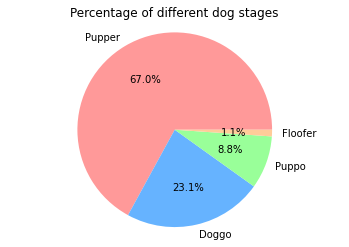

In [181]:
### Creating a pie Chart

plt.pie(diff_dog_stages, labels= ['Pupper', 'Doggo', 'Puppo', 'Floofer'], autopct= "%1.1f%%",shadow = False, colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99'])

plt.title('Percentage of different dog stages')

plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle

## Insights(a)

1. Pupper is the dog stage with the highest percentage(67%)
2. Floofer has the lowest percentage (1.1%)

### b. Relationship between favorite count and retweet count

Text(0.5, 1.0, 'Relationship between favorite count and retweet count')

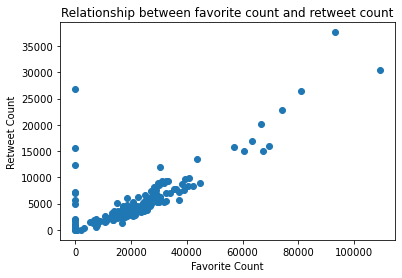

In [182]:
plt.scatter(df['favorite_count'],df['retweet_count'])
plt.xlabel('Favorite Count')
plt.ylabel('Retweet Count')
plt.title('Relationship between favorite count and retweet count')

## Insights(b)

It can be seen that there is a high postive correlation between retweet count and the favorite count.

It can be seen that as the the favorite count increases as the retweet counts increases

## c. The most popular dog breed

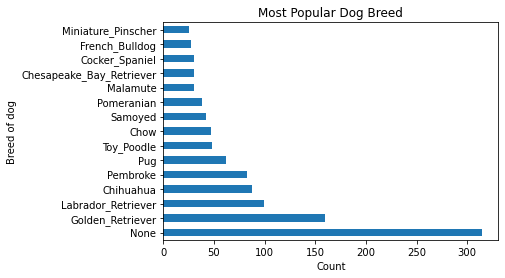

In [179]:
# Bar Chart to visualize dog breeeds
dog_breed = df.groupby('dog_breed').filter(lambda x: len(x) >= 25)

dog_breed['dog_breed'].value_counts().plot(kind = 'barh')
plt.title('Most Popular Dog Breed')
plt.xlabel('Count')
plt.ylabel('Breed of dog');

## Insights(c)

From the Bar Chart, it can be seem that the most popular dog breed is a *Golden Retriever*, with a *Labrador Retriever* coming in as the second most popular breed.